In [27]:
# 49e99c4
# branch: parameter search implementation

import openpiv_recipes as piv
import numpy as np
from matplotlib import pyplot as plt
from importlib import reload
reload(piv)

folder_path = '/Users/yeonsu/Dropbox (Harvard University)/Riblet/data/piv-data/2021-02-04'
folder_path = '/Volumes/Backup Plus /ROWLAND/piv-data/2021-02-04'
folder_path = 'C:/Users/yj/Dropbox (Harvard University)/Riblet/data/piv-data/2021-01-18'
folder_path = 'C:/Users/yj/Documents/Chronos/2021-02-04'
pi = piv.ParticleImage(folder_path)

exp_cond_dict = {'sample': 'Flat_10', 'motor': 5}
pi.set_piv_list(exp_cond_dict)

piv_param = {
    "winsize": 48,
    "searchsize": 52,
    "overlap": 24,
    "dt": 0.0001,
    "image_check": False,
    "show_vertical_profiles": False,
    "figure_export_name": '_quick_piv.tiff',
    "text_export_name": '_quick_piv.txt',
    "scale_factor": 1,            
    "pixel_density": 39.545,
    "arrow_width": 0.02,
    "show_result": True,        
    }

In [41]:
def large_quiver(window_size,scaling_factor,crop = (0,0)):
    bgd, bgd2 = pi.read_two_images(search_dict,index_a=101,index_b=102)
    bgd = -np.array(bgd)
    piv_result = np.loadtxt('_quick_piv.txt')
    arrow_width = 0.002

    xx = piv_result[:,0].T * 0.8 * bgd.shape[1] / np.max(piv_result[:,0])
    yy = piv_result[:,1].T * bgd.shape[0] / np.max(piv_result[:,1])
    uu = piv_result[:,2].T
    vv = piv_result[:,3].T
    
    

    fig, ax = plt.subplots(figsize=(10,10))

    xmax = np.amax(piv_result[:, 0]) + window_size / (2 * scaling_factor)
    ymax = np.amax(piv_result[:, 1]) + window_size / (2 * scaling_factor)    
    

    ax.quiver(xx,yy,uu,vv,angles='uv',width=arrow_width,color='r')
    ax.imshow(bgd,origin="lower", cmap="Greys_r",interpolation='nearest',aspect='auto')
    
def merge_dicts(*dict_args):
    """
    Given any number of dictionaries, shallow copy and merge into a new dict,
    precedence goes to key-value pairs in latter dictionaries.
    """
    result = {}
    for dictionary in dict_args:
        result.update(dictionary)
    return result

In [42]:
exp_cond_dict = {'sample': 'Flat_20', 'motor': 5}
pi.set_piv_list(exp_cond_dict)

In [43]:
search_dict = {'pos': 2, 'VOFFSET': 336}

In [62]:
small = {"winsize": 16, "searchsize": 20, "overlap": 8,}
middle = {"winsize": 32, "searchsize": 36, "overlap": 16}

scales = {"pixel_density": 41.8,"scale_factor": 1e3, "arrow_width": 0.001}
bounds = {"u_upper_bound": 250,"u_lower_bound": 0,"v_upper_bound": 50,"v_lower_bound": -50}
dt = {"dt": 0.0001}
tr = {"transpose": True}
ic = {"show_result": True}
crop = {"crop": [0,0,0,0]}
misc = merge_dicts(scales,bounds,crop,tr,ic,dt)

pi.set_piv_param(middle)
pi.set_piv_param(misc)

- PIV parameters -
winsize: 48
searchsize: 52
overlap: 24
dt: 0.0001
image_check: False
show_vertical_profiles: False
figure_export_name: _quick_piv.tiff
text_export_name: _quick_piv.txt
scale_factor: 1
pixel_density: 41.8
arrow_width: 0.01
show_result: True
u_upper_bound: 250
u_lower_bound: 0
v_upper_bound: 50
v_lower_bound: -50
transpose: True
crop: [0, 0, 0, 0]
Read image from: Flat_20_motor5.00_pos10_VOFFSET336_ag2_laser10_[02-04].tiff


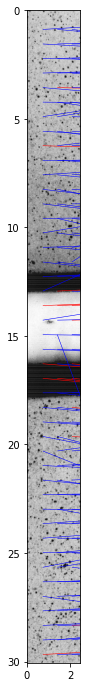

Mean of u: 104.293
Std of u: 42.965
Mean of v: -1.234
Std of v: 11.131
Read image from: Flat_20_motor5.00_pos10_VOFFSET336_ag2_laser10_[02-04].tiff


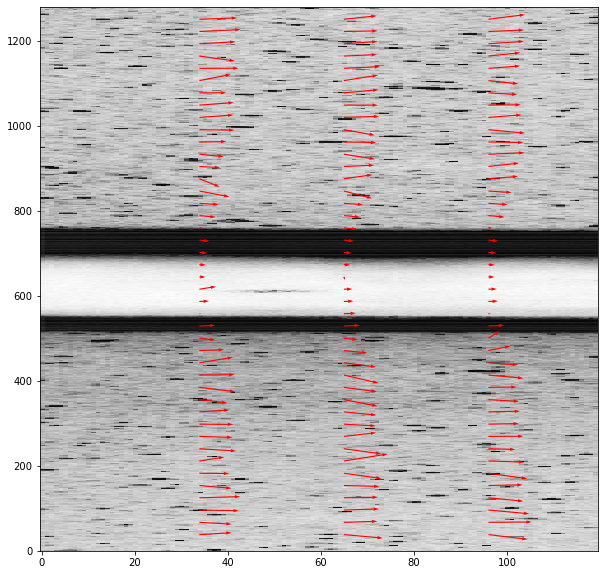

In [63]:
large = {"winsize": 48, "searchsize": 52, "overlap": 24, "scale_factor": 1, "arrow_width": 0.01}
pi.set_piv_param(large)

search_dict = {'pos': 10, 'VOFFSET': 336}
pi.quick_piv(search_dict,index_a=100,index_b=101)
large_quiver(48,1)

- PIV parameters -
winsize: 32
searchsize: 36
overlap: 16
dt: 0.0001
image_check: False
show_vertical_profiles: False
figure_export_name: _quick_piv.tiff
text_export_name: _quick_piv.txt
scale_factor: 500
pixel_density: 41.8
arrow_width: 0.02
show_result: True
u_upper_bound: 250
u_lower_bound: 0
v_upper_bound: 50
v_lower_bound: -50
transpose: True
crop: [0, 0, 0, 0]
Read image from: Flat_20_motor5.00_pos10_VOFFSET336_ag2_laser10_[02-04].tiff


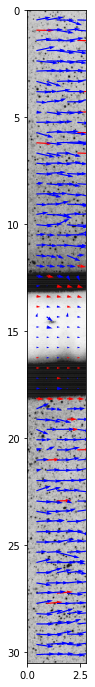

Mean of u: 108.035
Std of u: 48.166
Mean of v: 0.350
Std of v: 16.247
Read image from: Flat_20_motor5.00_pos10_VOFFSET336_ag2_laser10_[02-04].tiff


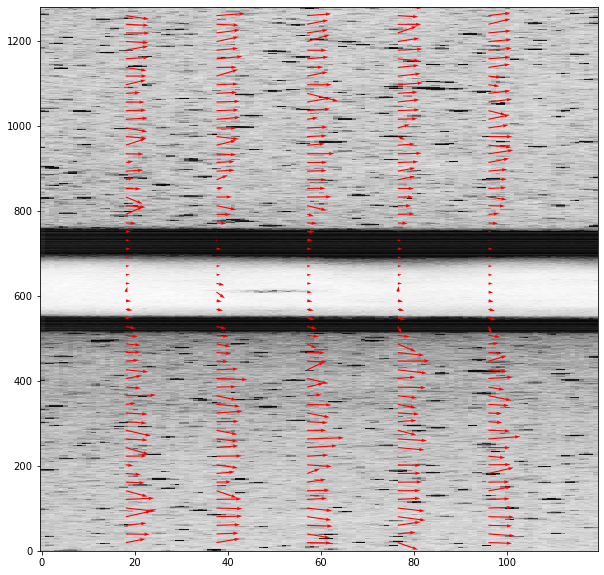

In [74]:
middle = {"winsize": 32, "searchsize": 36, "overlap": 16, "scale_factor": 500,"arrow_width": 0.02}
pi.set_piv_param(middle)
pi.quick_piv(search_dict,index_a=100,index_b=101)
large_quiver(32,1)

- PIV parameters -
winsize: 16
searchsize: 20
overlap: 8
dt: 0.0001
image_check: False
show_vertical_profiles: False
figure_export_name: _quick_piv.tiff
text_export_name: _quick_piv.txt
scale_factor: 1000.0
pixel_density: 41.8
arrow_width: 0.02
show_result: True
u_upper_bound: 250
u_lower_bound: 0
v_upper_bound: 50
v_lower_bound: -50
transpose: True
crop: [0, 0, 0, 0]
Read image from: Flat_20_motor5.00_pos10_VOFFSET336_ag2_laser10_[02-04].tiff


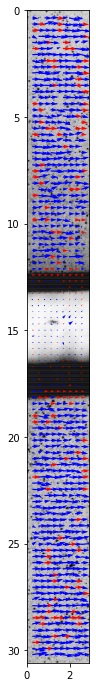

Mean of u: 104.014
Std of u: 52.261
Mean of v: 1.475
Std of v: 14.860
Read image from: Flat_20_motor5.00_pos10_VOFFSET336_ag2_laser10_[02-04].tiff


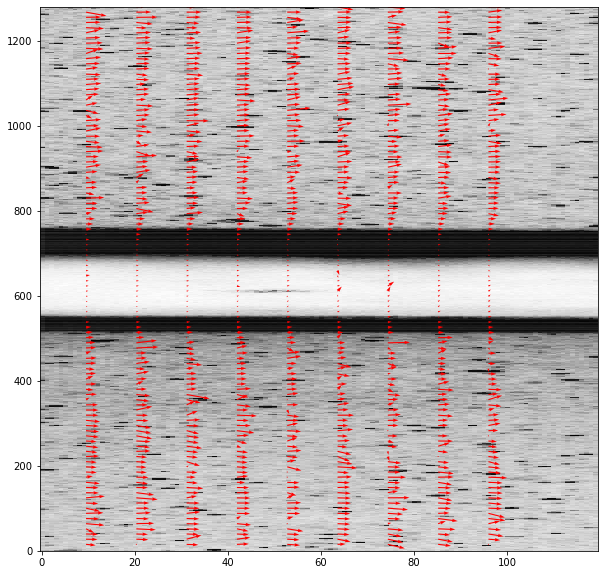

In [78]:
small = {"winsize": 16, "searchsize": 20, "overlap": 8, "scale_factor": 1e3}
pi.set_piv_param(small)
xx,yy,uu,vv = pi.quick_piv(search_dict,index_a=100,index_b=101)
large_quiver(16,1)

- PIV parameters -
winsize: 16
searchsize: 20
overlap: 8
dt: 0.0001
image_check: False
show_vertical_profiles: False
figure_export_name: _quick_piv.tiff
text_export_name: _quick_piv.txt
scale_factor: 1000.0
pixel_density: 41.8
arrow_width: 0.02
show_result: True
u_upper_bound: 250
u_lower_bound: 0
v_upper_bound: 50
v_lower_bound: -50
transpose: True
crop: [0, 0, 0, 0]
Read image from: Flat_20_motor5.00_pos10_VOFFSET336_ag2_laser10_[02-04].tiff


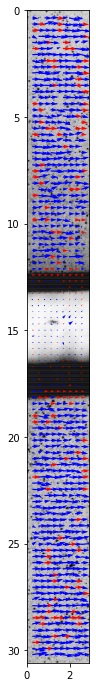

Mean of u: 104.014
Std of u: 52.261
Mean of v: 1.475
Std of v: 14.860
Read image from: Flat_20_motor5.00_pos10_VOFFSET336_ag2_laser10_[02-04].tiff


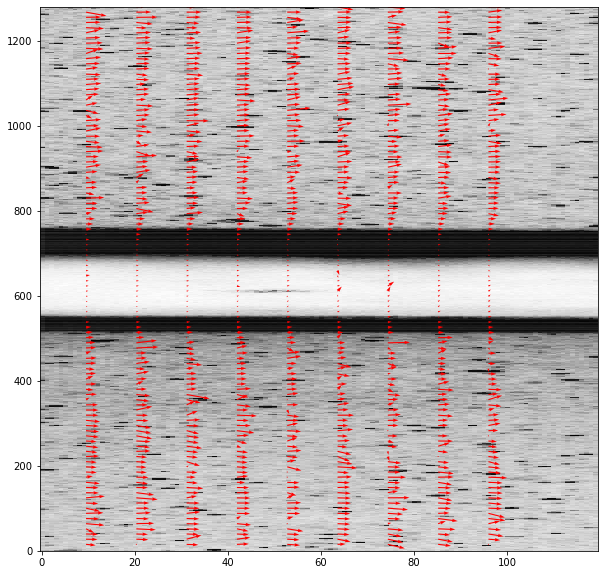

In [96]:
small = {"winsize": 16, "searchsize": 20, "overlap": 8, "scale_factor": 1e3,'crop': [0,0,0,0]}
pi.set_piv_param(small)
xx,yy,uu,vv = pi.quick_piv(search_dict,index_a=100,index_b=101)
large_quiver(16,1)

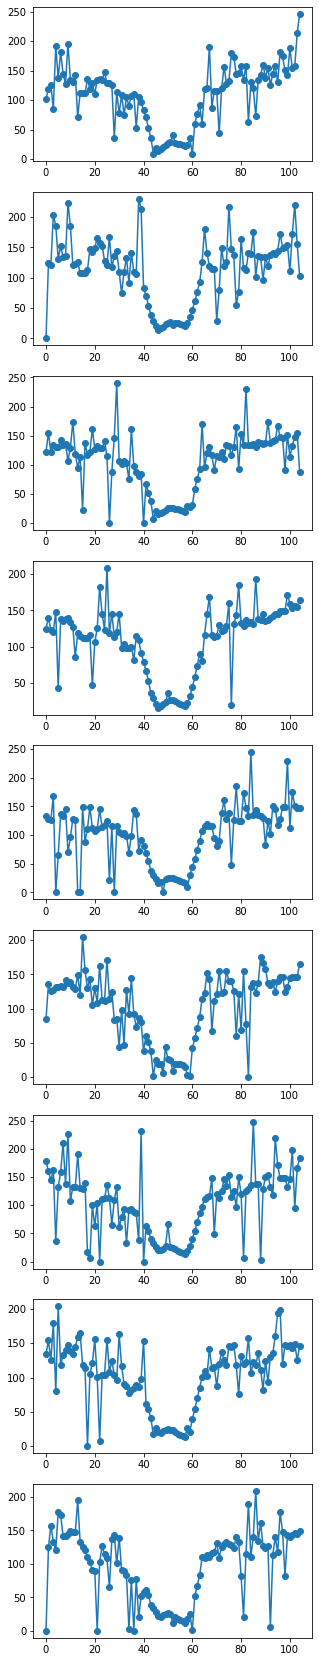

In [101]:
fig, ax = plt.subplots(9,figsize=(5,30))
for i in range(9):
    ax[i].plot(uu[:,i],'o-')